# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(type(X_train))

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
<class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import pandas as pd

from tensorflow.contrib.layers import flatten

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(pd.unique(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import seaborn as sns

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


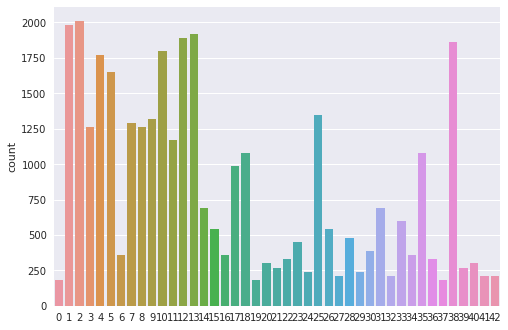

In [6]:
sns.countplot(y_train)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


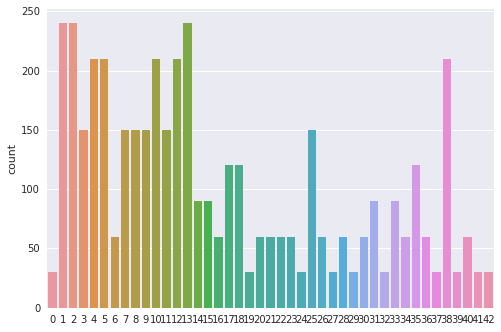

In [7]:
sns.countplot(y_valid)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle


In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

print(X_train_rgb.shape)
print(X_train_gray.shape)

print(X_test_rgb.shape)
print(X_test_gray.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)


### Model Architecture

In [10]:
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

The dataset is preprocessed by dividing the 3 axis by 3 inorder to make the images grayscale
The architecture which I made has 4 CONV layers with 3x3 filters with depth starting from 32 to 64. I tried following the VGG16 concept like model with 3x3 and then its flatten and then 2 dense layers with 1024 units with 0.5 dropouts and the last dense of 43 representing the 43 signs.
Before I can to this architecture I tried making multiple architecture with lesser depth of in terms of filters and what I saw was that they tend to flat out in terms of performance at somewhere like 15 epochs, even training more they couldn't make much out of the data based on their smaller architecture.
Hence, I went with a bigger and deeper architecture and it worked really well. I think, if I can make it more bigger and see the accuracy go to 99% but that'll require more time. So, for now this is it.

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    conv1=tf.layers.conv2d(x,kernel_size=[3,3],filters=32,activation=tf.nn.relu,padding='SAME')
    pool1=tf.layers.max_pooling2d(conv1,pool_size=[2,2],strides=1)
    
    conv2=tf.layers.conv2d(pool1,kernel_size=[3,3],filters=32,activation=tf.nn.relu,padding='SAME')
    pool2=tf.layers.max_pooling2d(conv2,pool_size=[2,2],strides=2)
    
    conv3=tf.layers.conv2d(pool2,kernel_size=[3,3],filters=64,activation=tf.nn.relu,padding='SAME')
    pool3=tf.layers.max_pooling2d(conv3,pool_size=[2,2],strides=1)
    
    conv3=tf.layers.conv2d(pool2,kernel_size=[3,3],filters=64,activation=tf.nn.relu,padding='SAME')
    pool3=tf.layers.max_pooling2d(conv3,pool_size=[2,2],strides=2)
    
    
    layer_flat=flatten(inputs=pool3)
    
    dense1=tf.layers.dense(inputs=layer_flat,units=1024,activation=tf.nn.relu)
    layer_drop1=tf.layers.dropout(inputs=dense1,rate=keep_prob)
       
    dense2=tf.layers.dense(inputs=layer_drop1,units=1024,activation=tf.nn.relu)
    layer_drop2=tf.layers.dropout(inputs=dense2,rate=keep_prob)
 
    
    dense3=tf.layers.dense(layer_drop2,units=43)
    
    
    return dense3

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

In [13]:
x1=LeNet(x)
x1

<tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 43) dtype=float32>

In [14]:

rate = 0.0001

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:

EPOCHS = 5
BATCH_SIZE = 64

from time import time

The above model is trained twice, in order to see where it flattened out. In overall I trained it for 20 epochs. 

In [22]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './model_v1')

    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy_figure = []
    train_accuracy_figure = []
    for i in range(EPOCHS):
        t0=time()
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
          
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        print('time spend per epoch:{}',(time()-t0))
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_figure.append(validation_accuracy)
        
        train_accuracy = evaluate(X_train, y_train)
        train_accuracy_figure.append(train_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model_v2')
    print("Model saved")

INFO:tensorflow:Restoring parameters from ./model_v1
Training...

time spend per epoch:{} 80.88707566261292
EPOCH 1 ...
Train Accuracy = 0.998
Validation Accuracy = 0.922

time spend per epoch:{} 77.21987628936768
EPOCH 2 ...
Train Accuracy = 0.997
Validation Accuracy = 0.933

time spend per epoch:{} 80.63604807853699
EPOCH 3 ...
Train Accuracy = 0.997
Validation Accuracy = 0.917

time spend per epoch:{} 77.62656307220459
EPOCH 4 ...
Train Accuracy = 0.998
Validation Accuracy = 0.929

time spend per epoch:{} 80.77118253707886
EPOCH 5 ...
Train Accuracy = 0.997
Validation Accuracy = 0.934

time spend per epoch:{} 77.81431245803833
EPOCH 6 ...
Train Accuracy = 1.000
Validation Accuracy = 0.950

time spend per epoch:{} 80.22899198532104
EPOCH 7 ...
Train Accuracy = 1.000
Validation Accuracy = 0.949

time spend per epoch:{} 77.8005518913269
EPOCH 8 ...
Train Accuracy = 0.997
Validation Accuracy = 0.937

time spend per epoch:{} 80.28973269462585
EPOCH 9 ...
Train Accuracy = 0.998
Validation

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


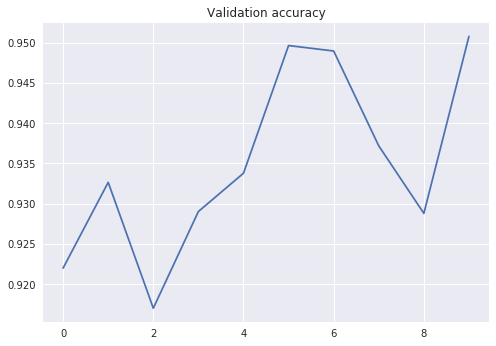

In [23]:
plt.plot(validation_accuracy_figure)
plt.title('Validation accuracy')
plt.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


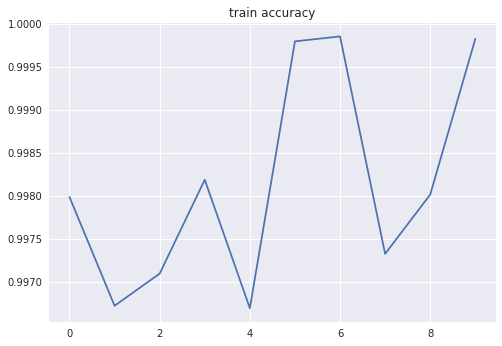

In [24]:
plt.plot(train_accuracy_figure)
plt.title('train accuracy')
plt.show()

In [29]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    #my_saver = tf.train.import_meta_graph('./model_new_1.meta')
   
    saver.restore(sess, './model_v2')

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model_v2
Train Accuracy = 1.000
Valid Accuracy = 0.951
Test Accuracy = 0.944


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imread,imshow
image1=imread('1.png')
image2=imread('2.png')
image3=imread('3.png')
image4=imread('4.png')
image5=imread('5.png')
image6=imread('6.png')


In [16]:

labels=np.array([1, 22, 35, 15, 37, 18])

my_signs=np.array([image1,image2,image3,image4,image5,image6])

In [17]:
my_signs = np.array(my_signs)
my_signs_gray = np.sum(my_signs/3, axis=3, keepdims=True)


Preprocessing of the images which I downloaded from web

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


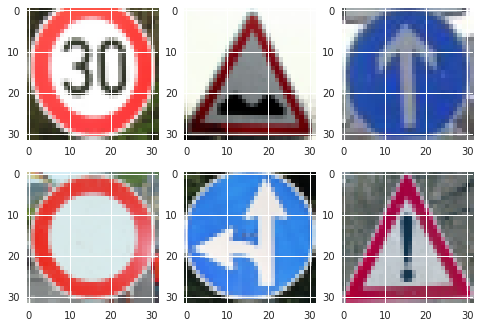

In [18]:
fig,axes=plt.subplots(2,3)
for i,ax in enumerate(axes.flat):

    ax.imshow(my_signs[i,...].astype('uint8'))

plt.show()

In [19]:
my_signs_gray.shape

(6, 32, 32, 1)

The code below this shows the method using which I converted the images to 32x32.

In [20]:
# from PIL import Image

# img = Image.open('img6.png')
# wpercent = (32/float(img.size[0]))
# hsize = int((float(img.size[1])*float(wpercent)))
# img = img.resize((32,32), Image.ANTIALIAS)
# img.save('6.png') 

In [24]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./model_v2")
    my_accuracy = evaluate(my_signs_gray,labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./model_v2
My Data Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

In [26]:
sign_names=open('signnames.csv','r')
sign_names_dic={}
for i in sign_names:
    sign_names_dic[i.split(',')[0]]=i.split(',')[1]

INFO:tensorflow:Restoring parameters from ./model_v2


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


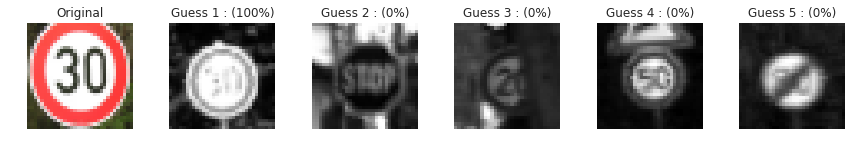

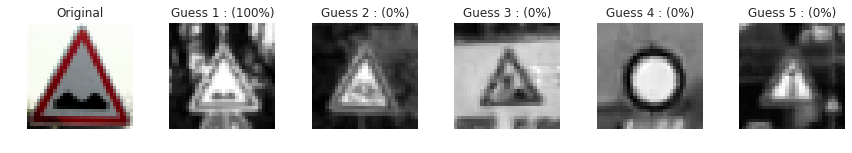

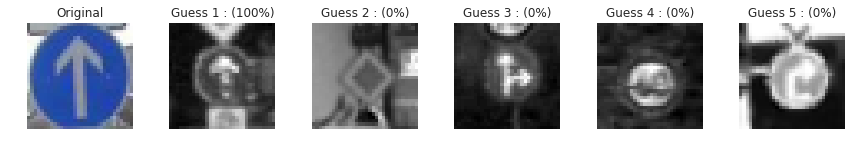

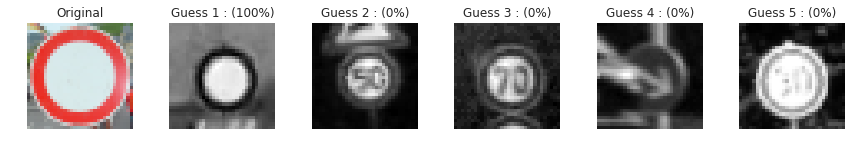

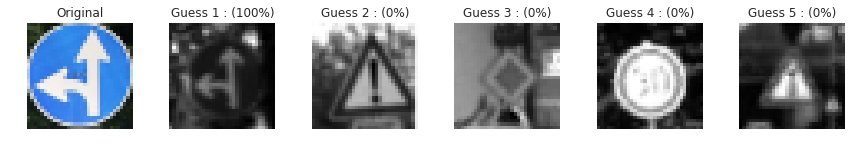

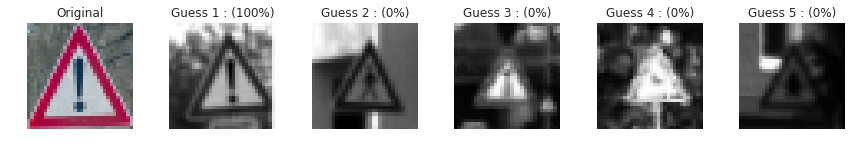

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     my_saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./model_v2")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_signs_gray, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_signs_gray, keep_prob: 1.0})
#     print(my_top_k)

    for i in range(6):
        figures = {}
        labels = {}
        
        figures[0] = my_signs[i]
        labels[0] = "Original"
        
        for j in range(k_size):
#             print('Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j]))
            labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
            
#         print()
        plot_figures(figures, 1, 6, labels)

The trained model is 100% certain of the downloaded images belong to one class which is also the correct class.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.